<a href="https://colab.research.google.com/github/CobaMasa/PythonKerasDeeplearning/blob/main/chapter6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chpater6: Deep Learning for Texts and Sequences

In [1]:
# List6-6: Load IMDb
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
# List6-7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Embedding, Input

inputs = Input(shape=max_len)
x = Embedding(10000, 8)(inputs)
x = Flatten()(x)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=prediction)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6688 - acc: 0.6216 - val_loss: 0.6161 - val_acc: 0.6970
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5366 - acc: 0.7520 - val_loss: 0.5214 - val_acc: 0.7320
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4593 - acc: 0.7879 - val_loss: 0.4990 - val_acc: 0.7444
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4233 - acc: 0.8077 - val_loss: 0.4931 - val_acc: 0.7498
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4001 - acc: 0.8188 - val_loss: 0.4923 - val_acc: 0.7552
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3803 - acc: 0.8299 - val_loss: 0.4952 - val_acc: 0.7548
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3622 - acc: 0.8407 - val_loss: 0.4999 - val_acc: 0.7536
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

pass List 6-8~6-18(about using pre-trained word embedding )

In [11]:
# List 6-21: Simple RNN with numpy
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

In [32]:
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
model = Sequential() 
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [35]:
# List 6-22: Preprocess IMDb
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print('Loading ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading ...
25000 train sequences
25000 test_sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [36]:
# List 6-23: Train a model with Embedding & Simple RNN
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, batch_size))
model.add(SimpleRNN(batch_size))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 26s 167ms/step - loss: 0.6181 - acc: 0.6400 - val_loss: 0.4986 - val_acc: 0.7502
Epoch 2/10
157/157 [==============================] - 25s 158ms/step - loss: 0.3845 - acc: 0.8348 - val_loss: 0.3832 - val_acc: 0.8366
Epoch 3/10
157/157 [==============================] - 26s 167ms/step - loss: 0.2851 - acc: 0.8871 - val_loss: 0.4312 - val_acc: 0.7984
Epoch 4/10
157/157 [==============================] - 25s 157ms/step - loss: 0.2363 - acc: 0.9094 - val_loss: 0.3564 - val_acc: 0.8574
Epoch 5/10
157/157 [==============================] - 26s 163ms/step - loss: 0.1898 - acc: 0.9291 - val_loss: 0.4268 - val_acc: 0.8442
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1351 - acc: 0.9498 - val_loss: 0.4718 - val_acc: 0.8360
Epoch 7/10
157/157 [==============================] - 27s 171ms/step - loss: 0.1020 - acc: 0.9643 - val_loss: 0.4809 - val_acc: 0.8244
Epoch 8/10
157/157 [==============================] - 2

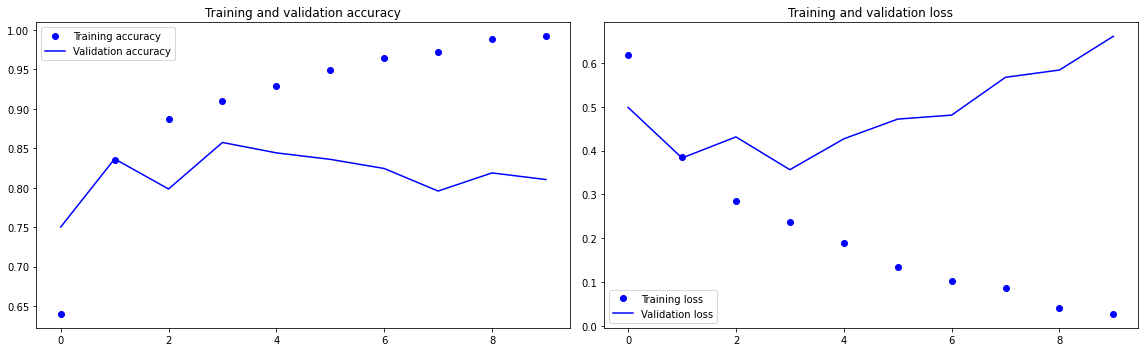

In [40]:
# List 6-24: Plot the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].set_title('Training and validation accuracy')
ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend()

ax[1].set_title('Training and validation loss')
ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend()

plt.tight_layout()
plt.show();

In [41]:
# List 6-27: Use LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, batch_size))
model.add(LSTM(batch_size))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 363ms/step - loss: 0.5510 - acc: 0.7440 - val_loss: 0.4381 - val_acc: 0.7860
Epoch 2/10
157/157 [==============================] - 59s 376ms/step - loss: 0.3207 - acc: 0.8724 - val_loss: 0.3022 - val_acc: 0.8780
Epoch 3/10
157/157 [==============================] - 59s 374ms/step - loss: 0.2472 - acc: 0.9043 - val_loss: 0.3758 - val_acc: 0.8494
Epoch 4/10
157/157 [==============================] - 59s 376ms/step - loss: 0.2065 - acc: 0.9232 - val_loss: 0.2976 - val_acc: 0.8782
Epoch 5/10
157/157 [==============================] - 59s 375ms/step - loss: 0.1910 - acc: 0.9298 - val_loss: 0.2857 - val_acc: 0.8874
Epoch 6/10
157/157 [==============================] - 60s 380ms/step - loss: 0.1635 - acc: 0.9414 - val_loss: 0.4132 - val_acc: 0.8512
Epoch 7/10
157/157 [==============================] - 59s 379ms/step - loss: 0.1485 - acc: 0.9480 - val_loss: 0.3058 - val_acc: 0.8882
Epoch 8/10
157/157 [==============================] - 5

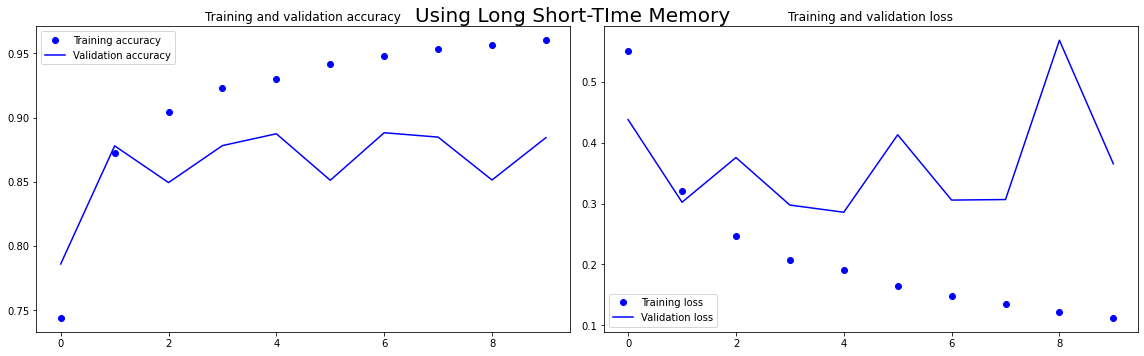

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

fig.suptitle('Using Long Short-TIme Memory', fontsize=20)
ax[0].set_title('Training and validation accuracy')
ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend()

ax[1].set_title('Training and validation loss')
ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend()

plt.tight_layout()
plt.show();